In [1]:
import sys
import warnings
warnings.filterwarnings("ignore")
# Uncomment the line below to install the python visualization tool. 
# !{sys.executable} -m pip install bokeh==2.0.0
# !{sys.executable} -m pip install pyvis

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import bokeh.io as bokeh_io
import pylab
from pyvis.network import Network
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure , from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap

In [35]:
# Create dataframe.
df = pd.read_csv(
    '1280.protein.links.v11.5.txt', 
    header = 0, 
    skip_blank_lines = True, 
    low_memory = True,
    sep = " "
)

# Select only high confidence (>90%) scores
df_90 = df[df["combined_score"] > 900]

In [36]:
print(df)

                 protein1           protein2  combined_score
0       1280.SAXN108_0001  1280.SAXN108_1258             449
1       1280.SAXN108_0001  1280.SAXN108_2805             191
2       1280.SAXN108_0001  1280.SAXN108_0727             200
3       1280.SAXN108_0001  1280.SAXN108_1756             205
4       1280.SAXN108_0001  1280.SAXN108_0046             314
...                   ...                ...             ...
569867  1280.SAXN108_2992  1280.SAXN108_0017             934
569868  1280.SAXN108_2992  1280.SAXN108_0018             154
569869  1280.SAXN108_2992  1280.SAXN108_2527             197
569870  1280.SAXN108_2992  1280.SAXN108_0606             311
569871  1280.SAXN108_2992  1280.SAXN108_1496             512

[569872 rows x 3 columns]


In [37]:
print(df_90)

                 protein1           protein2  combined_score
85      1280.SAXN108_0001  1280.SAXN108_0002             996
147     1280.SAXN108_0001  1280.SAXN108_0003             990
377     1280.SAXN108_0001  1280.SAXN108_0018             958
389     1280.SAXN108_0001  1280.SAXN108_1710             916
419     1280.SAXN108_0001  1280.SAXN108_0005             901
...                   ...                ...             ...
569849  1280.SAXN108_2992  1280.SAXN108_2492             997
569850  1280.SAXN108_2992  1280.SAXN108_2490             998
569861  1280.SAXN108_2992  1280.SAXN108_2476             997
569863  1280.SAXN108_2992  1280.SAXN108_2497             997
569867  1280.SAXN108_2992  1280.SAXN108_0017             934

[11634 rows x 3 columns]


In [52]:
# Create graph from Pandas dataframe.
networkxG = nx.from_pandas_edgelist(df_90, 
                                    source = "protein1",
                                    target = "protein2",
                                    edge_attr=["combined_score"])

In [53]:
networkxG.number_of_nodes()

1603

In [54]:
networkxG.number_of_edges()

5817

In [55]:
nx.is_connected(networkxG)

False

In [56]:
nx.number_connected_components(networkxG)

150

In [57]:
# Create a list of the connected components sorted by size.
connected_components = sorted(nx.connected_components(networkxG), key = len, reverse=True)
print(connected_components)

[{'1280.SAXN108_2811', '1280.SAXN108_0178', '1280.SAXN108_2478', '1280.SAXN108_0167', '1280.SAXN108_1718', '1280.SAXN108_1675', '1280.SAXN108_1878', '1280.SAXN108_2882', '1280.SAXN108_1799', '1280.SAXN108_2473', '1280.SAXN108_2557', '1280.SAXN108_1862', '1280.SAXN108_1376', '1280.SAXN108_2926', '1280.SAXN108_1141', '1280.SAXN108_1345', '1280.SAXN108_1579', '1280.SAXN108_2467', '1280.SAXN108_2876', '1280.SAXN108_2114', '1280.SAXN108_1797', '1280.SAXN108_1747', '1280.SAXN108_2497', '1280.SAXN108_1173', '1280.SAXN108_1242', '1280.SAXN108_2613', '1280.SAXN108_1344', '1280.SAXN108_1145', '1280.SAXN108_2869', '1280.SAXN108_2444', '1280.SAXN108_2353', '1280.SAXN108_0541', '1280.SAXN108_1408', '1280.SAXN108_0843', '1280.SAXN108_1166', '1280.SAXN108_0136', '1280.SAXN108_0100', '1280.SAXN108_0992', '1280.SAXN108_0648', '1280.SAXN108_1290', '1280.SAXN108_0417', '1280.SAXN108_0830', '1280.SAXN108_1431', '1280.SAXN108_2309', '1280.SAXN108_0236', '1280.SAXN108_1620', '1280.SAXN108_1472', '1280.SAXN1

In [68]:
between_centrality = nx.betweenness_centrality(networkxG)
top_10_between_centrality = sorted(between_centrality, key = lambda x: between_centrality[x], reverse=True)[:10]
print(top_10_between_centrality)

['1280.SAXN108_0522', '1280.SAXN108_1294', '1280.SAXN108_1726', '1280.SAXN108_1799', '1280.SAXN108_0407', '1280.SAXN108_0581', '1280.SAXN108_2479', '1280.SAXN108_1181', '1280.SAXN108_0596', '1280.SAXN108_0440']


In [71]:
between_centrality["1280.SAXN108_0856"]

0.02713444347599725

# Visualization

*Adapted from https://melaniewalsh.github.io/Intro-Cultural-Analytics/06-Network-Analysis/02-Making-Network-Viz-with-Bokeh.html*

In [58]:
# View interactive Bokeh visualizations in Jupyter notebook.
bokeh_io.output_notebook()

Loading BokehJS ...

In [59]:
# Calculate degree for each node and add as node attribute.
degrees = dict(nx.degree(networkxG))
nx.set_node_attributes(networkxG, name='degree', values=degrees)

In [60]:
# Top 5 nodes with the largest degrees.
sorted(degrees.items(), key=lambda kv: kv[1], reverse=True)[0:5]

[('1280.SAXN108_0522', 75),
 ('1280.SAXN108_2498', 72),
 ('1280.SAXN108_2496', 70),
 ('1280.SAXN108_0600', 70),
 ('1280.SAXN108_2483', 69)]

In [61]:
# Slightly adjust degree so that nodes with very small degrees 
# are visible.
OFFSET = 2
adjusted_node_size = dict([(node, degree//OFFSET) 
                           for node, degree in nx.degree(networkxG)])
nx.set_node_attributes(networkxG, name='adjusted_node_size', 
                             values=adjusted_node_size)

In [62]:
# Choose attributes from G network to size and color by — setting manual 
# size (e.g. 10) or color (e.g. 'skyblue') also allowed. 
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Oranges8

# Choose a title!
title = 'Staphylococcus aureus PPI Network'

# Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("String ProteinID", "@index"),
        ("Degree", "@degree")
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

# Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html\
network_graph = from_networkx(networkxG, nx.spring_layout, scale=100, center=(0, 0))

# Set node sizes and colors according to node degree (color as spectrum of color palette)
minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, maximum_value_color, minimum_value_color))

# Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

plot.renderers.append(network_graph)
bokeh_io.show(plot)

Text(0, 0.5, 'Frequency')

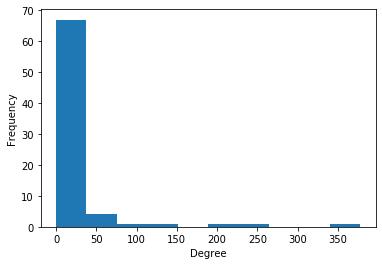

In [63]:
# Degree distribution.
plt.hist(nx.degree_histogram(networkxG))
plt.xlabel("Degree")
plt.ylabel("Frequency")

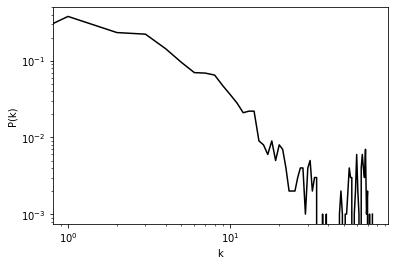

In [64]:
n = 1000
Pk = [float(x) / n for x in nx.degree_histogram(networkxG)]
domain = range(len(Pk))
x = pylab.loglog(domain, Pk, color="k")
pylab.xlabel("k")
pylab.ylabel("P(k)")
pylab.show()